<bound method NDFrame.head of           DMR Number             Part Job Number Lot Number  \
Sys Date                                                      
08                 0                0          0          0   
01                 0                0          0          0   
01                 0                0          0          0   
01                 0                0          0          0   
01                 0                0          0          0   
...              ...              ...        ...        ...   
02             16337            HC106      81266        NaN   
07             16610          FG118W2      83307        NaN   
09             16697  FR250SMRAD11200        NaN      82866   
09             16720           FG116X      83898        NaN   
09             16723            HC106        NaN        NaN   

                     Product Group  Total Discrepant Qty  Total Accepted Qty  \
Sys Date                                                              

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


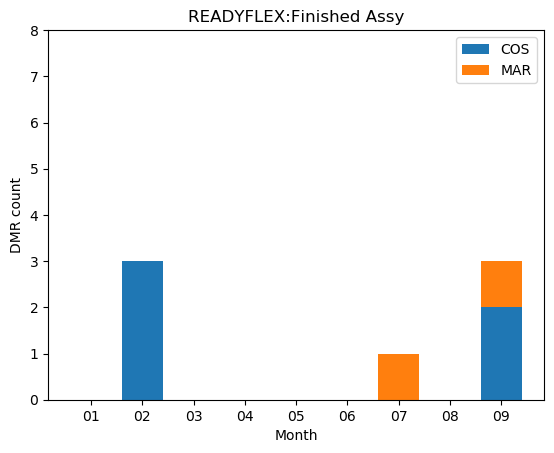

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('DMR.csv')
#print(df.iloc[1,:])
df['Sys Date']=pd.to_datetime(df['Sys Date'])
df['Sys Date']=df['Sys Date'].dt.strftime('%m')
#df=df.iloc[:,0:2]
cls="READYFLEX:Finished Assy"


df["TF"]=df['Class']==cls

df=df.set_index("Sys Date")
df.loc[df["TF"]==False]=0
#df["Sys Date"]=df.index.to_numpy()
print(df.head)
dfaer=df[df['Class'].str.contains(cls)==1]
#print(dfaer.head)
p1=pd.pivot_table(df,index='Sys Date',columns='DefGroup',values='DMR Number',aggfunc='count')
p1=p1.fillna(0)
p1=p1.drop(columns=[0])
print(p1)

x=p1.index.to_numpy()


lbl=p1.columns.to_numpy()
hor_len=len(lbl)
ver_len=len(p1.iloc[:,0].to_numpy())
bot=[0]*ver_len
#print(ver_len)
#print(hor_len)
for i in range(0,hor_len):
    y=p1.iloc[:,i].to_numpy()
    #print(y)
    #print(x)
    plt.bar(x,y,bottom=bot,label=lbl[i])
    bot=np.add(bot,y)
ax =plt.subplot()
ax.legend()
ax.set_ylabel("DMR count")
ax.set_title(cls)
ax.set_xlabel("Month")

ax.set_ylim(0,np.max(bot)+5)
#plt.savefig("Aero1.png")
plt.show()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


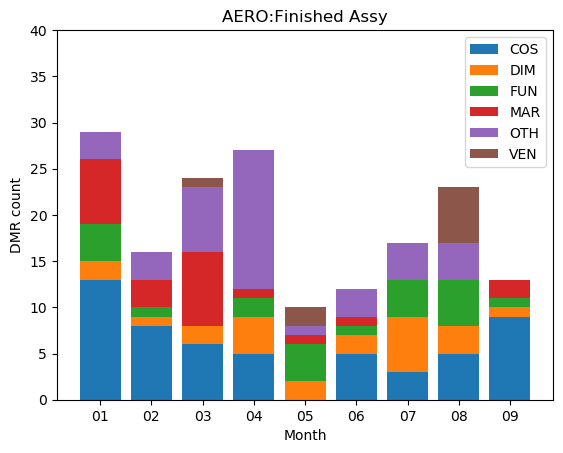